<a href="https://colab.research.google.com/github/BatXprO/batxpro.githib.io/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a simple neural network from scratch using Python.

In [ ]:
import numpy as np

# Define the architecture based on the previous subtask
n_input = 2
n_hidden = 8  # Example number of hidden neurons
n_output = 1

# Initialize weights and biases
weights_input_hidden = np.random.randn(n_input, n_hidden)
biases_hidden = np.random.randn(1, n_hidden)
weights_hidden_output = np.random.randn(n_hidden, n_output)
biases_output = np.random.randn(1, n_output)

print("Weights Input to Hidden:")
print(weights_input_hidden)
print("\nBiases Hidden:")
print(biases_hidden)
print("\nWeights Hidden to Output:")
print(weights_hidden_output)
print("\nBiases Output:")
print(biases_output)

## Implement the forward propagation function

### Subtask:
Implement the forward propagation function.


**Reasoning**:
Implement the forward propagation function as described in the instructions, including the weighted sums and activation functions for both the hidden and output layers.



In [1]:
def relu(x):
  """ReLU activation function."""
  return np.maximum(0, x)

def sigmoid(x):
  """Sigmoid activation function."""
  return 1 / (1 + np.exp(-x))

def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
  """
  Performs forward propagation through the neural network.

  Args:
    X: Input data.
    weights_input_hidden: Weights for the input to hidden layer.
    biases_hidden: Biases for the hidden layer.
    weights_hidden_output: Weights for the hidden to output layer.
    biases_output: Biases for the output layer.

  Returns:
    A tuple containing:
      - hidden_output: Output of the hidden layer after activation.
      - final_output: Final output of the neural network after activation.
  """
  # Calculate weighted sum for the hidden layer
  hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden

  # Apply ReLU activation to the hidden layer
  hidden_output = relu(hidden_layer_input)

  # Calculate weighted sum for the output layer
  output_layer_input = np.dot(hidden_output, weights_hidden_output) + biases_output

  # Apply Sigmoid activation to the output layer
  final_output = sigmoid(output_layer_input)

  return hidden_output, final_output

# Example usage (assuming X is defined, e.g., X = np.random.randn(1, n_input))
# Replace with your actual input data
# X = np.random.randn(1, n_input)
# hidden_output, final_output = forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
# print("\nHidden Layer Output:")
# print(hidden_output)
# print("\nFinal Output:")
# print(final_output)

## Implement the backward propagation function

### Subtask:
Implement the backward propagation function.


**Reasoning**:
Implement the backward propagation function as described in the instructions, including calculating errors, deltas, and gradients.



In [2]:
def relu_derivative(x):
  """Derivative of the ReLU activation function."""
  return np.where(x > 0, 1, 0)

def sigmoid_derivative(x):
  """Derivative of the Sigmoid activation function."""
  return x * (1 - x)

def backward_propagation(X, y, hidden_output, final_output, weights_hidden_output, learning_rate):
  """
  Performs backward propagation through the neural network.

  Args:
    X: Input data.
    y: True labels.
    hidden_output: Output of the hidden layer from forward propagation.
    final_output: Final output of the network from forward propagation.
    weights_hidden_output: Weights from hidden to output layer.
    learning_rate: The learning rate for updating weights and biases.

  Returns:
    A tuple containing:
      - gradients_weights_hidden_output: Gradients for the hidden-to-output weights.
      - gradients_biases_output: Gradients for the output layer biases.
      - gradients_weights_input_hidden: Gradients for the input-to-hidden weights.
      - gradients_biases_hidden: Gradients for the hidden layer biases.
  """
  # Calculate the error at the output layer
  output_error = final_output - y

  # Calculate the derivative of the sigmoid activation function
  sigmoid_derivative_output = sigmoid_derivative(final_output)

  # Calculate the delta for the output layer
  output_delta = output_error * sigmoid_derivative_output

  # Calculate the error at the hidden layer
  hidden_error = np.dot(output_delta, weights_hidden_output.T)

  # Calculate the derivative of the ReLU activation function
  relu_derivative_hidden = relu_derivative(hidden_output)

  # Calculate the delta for the hidden layer
  hidden_delta = hidden_error * relu_derivative_hidden

  # Calculate gradients for the weights and biases
  gradients_weights_hidden_output = np.dot(hidden_output.T, output_delta)
  gradients_biases_output = np.sum(output_delta, axis=0, keepdims=True)
  gradients_weights_input_hidden = np.dot(X.T, hidden_delta)
  gradients_biases_hidden = np.sum(hidden_delta, axis=0, keepdims=True)

  return gradients_weights_hidden_output, gradients_biases_output, gradients_weights_input_hidden, gradients_biases_hidden

# Example usage (assuming X, y, hidden_output, final_output, weights_hidden_output are defined)
# Replace with your actual data
# X_sample = np.random.randn(1, n_input)
# y_sample = np.array([[0]]) # Example true label
# hidden_output_sample, final_output_sample = forward_propagation(X_sample, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)
# learning_rate_sample = 0.01

# gradients_weights_hidden_output, gradients_biases_output, gradients_weights_input_hidden, gradients_biases_hidden = backward_propagation(X_sample, y_sample, hidden_output_sample, final_output_sample, weights_hidden_output, learning_rate_sample)

# print("\nGradients Weights Hidden to Output:")
# print(gradients_weights_hidden_output)
# print("\nGradients Biases Output:")
# print(gradients_biases_output)
# print("\nGradients Weights Input to Hidden:")
# print(gradients_weights_input_hidden)
# print("\nGradients Biases Hidden:")
# print(gradients_biases_hidden)

## Implement the training function

### Subtask:
Implement the training function.


**Reasoning**:
Implement the training function as described in the instructions, including the forward and backward passes, loss calculation, gradient updates, and optional loss reporting.



In [3]:
def train(X, y, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate, epochs):
  """
  Trains the neural network using forward and backward propagation.

  Args:
    X: Input data.
    y: True labels.
    weights_input_hidden: Initial weights for the input to hidden layer.
    biases_hidden: Initial biases for the hidden layer.
    weights_hidden_output: Initial weights for the hidden to output layer.
    biases_output: Initial biases for the output layer.
    learning_rate: The learning rate for updating weights and biases.
    epochs: The number of training epochs.

  Returns:
    A tuple containing:
      - updated_weights_input_hidden: Trained weights for the input to hidden layer.
      - updated_biases_hidden: Trained biases for the hidden layer.
      - updated_weights_hidden_output: Trained weights for the hidden to output layer.
      - updated_biases_output: Trained biases for the output layer.
  """
  # Use the initial weights and biases, but update them during training
  updated_weights_input_hidden = weights_input_hidden
  updated_biases_hidden = biases_hidden
  updated_weights_hidden_output = weights_hidden_output
  updated_biases_output = biases_output

  for epoch in range(epochs):
    # Forward propagation
    hidden_output, final_output = forward_propagation(X, updated_weights_input_hidden, updated_biases_hidden, updated_weights_hidden_output, updated_biases_output)

    # Calculate Loss (Mean Squared Error)
    loss = np.mean(np.square(y - final_output))

    # Backward propagation
    gradients_weights_hidden_output, gradients_biases_output, gradients_weights_input_hidden, gradients_biases_hidden = backward_propagation(X, y, hidden_output, final_output, updated_weights_hidden_output, learning_rate)

    # Update weights and biases
    updated_weights_hidden_output -= learning_rate * gradients_weights_hidden_output
    updated_biases_output -= learning_rate * gradients_biases_output
    updated_weights_input_hidden -= learning_rate * gradients_weights_input_hidden
    updated_biases_hidden -= learning_rate * gradients_biases_hidden

    # Optional: Print loss every few epochs
    if epoch % 1000 == 0:
      print(f"Epoch {epoch}, Loss: {loss}")

  return updated_weights_input_hidden, updated_biases_hidden, updated_weights_hidden_output, updated_biases_output

# Example usage (assuming X and y are defined)
# X_train = np.random.randn(100, n_input) # Example training data
# y_train = np.random.randint(0, 2, size=(100, n_output)) # Example true labels

# learning_rate_train = 0.01
# epochs_train = 5000

# trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train(
#     X_train, y_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate_train, epochs_train
# )

# print("\nTrained Weights Input to Hidden:")
# print(trained_weights_input_hidden)
# print("\nTrained Biases Hidden:")
# print(trained_biases_hidden)
# print("\nTrained Weights Hidden to Output:")
# print(trained_weights_hidden_output)
# print("\nTrained Biases Output:")
# print(trained_biases_output)

## Train the neural network

### Subtask:
Train the neural network on a given dataset and evaluate its performance.


**Reasoning**:
The subtask requires training the neural network on example data and evaluating its performance. This involves creating training and test data, calling the training function, making predictions on test data, converting predictions to binary labels, and calculating accuracy. These steps can be grouped into a single code block.



In [4]:
# 1. Create example training data X_train and corresponding true labels y_train
#    for a binary classification problem.
np.random.seed(42) # for reproducibility
X_train = np.random.randn(100, n_input)
# Create a simple classification problem based on the input features
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int).reshape(-1, 1)

# 2. Call the train function with the training data, initial weights and biases,
#    a chosen learning rate, and a suitable number of epochs.
learning_rate_train = 0.01
epochs_train = 5000

trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train(
    X_train, y_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate_train, epochs_train
)

# 3. Create example test data X_test and corresponding true labels y_test
np.random.seed(99) # for reproducibility
X_test = np.random.randn(50, n_input)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int).reshape(-1, 1)

# 4. Use the trained weights and biases to perform forward propagation on the test data
_, final_output_test = forward_propagation(X_test, trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output)

# 5. Convert the predictions final_output_test into binary class labels (0 or 1)
predictions = (final_output_test > 0.5).astype(int)

# 6. Calculate the accuracy of the trained model
accuracy = np.mean(predictions == y_test)

# 7. Print the calculated accuracy.
print(f"\nAccuracy on the test data: {accuracy}")

NameError: name 'np' is not defined

In [6]:
import numpy as np

# Define the architecture based on the previous subtask
n_input = 2
n_hidden = 8  # Example number of hidden neurons
n_output = 1

# 1. Create example training data X_train and corresponding true labels y_train
#    for a binary classification problem.
np.random.seed(42) # for reproducibility
X_train = np.random.randn(100, n_input)
# Create a simple classification problem based on the input features
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int).reshape(-1, 1)

# 2. Call the train function with the training data, initial weights and biases,
#    a chosen learning rate, and a suitable number of epochs.
learning_rate_train = 0.01
epochs_train = 5000

trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train(
    X_train, y_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate_train, epochs_train
)

# 3. Create example test data X_test and corresponding true labels y_test
np.random.seed(99) # for reproducibility
X_test = np.random.randn(50, n_input)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int).reshape(-1, 1)

# 4. Use the trained weights and biases to perform forward propagation on the test data
_, final_output_test = forward_propagation(X_test, trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output)

# 5. Convert the predictions final_output_test into binary class labels (0 or 1)
predictions = (final_output_test > 0.5).astype(int)

# 6. Calculate the accuracy of the trained model
accuracy = np.mean(predictions == y_test)

# 7. Print the calculated accuracy.
print(f"\nAccuracy on the test data: {accuracy}")

NameError: name 'weights_input_hidden' is not defined

In [7]:
import numpy as np

# Define the architecture based on the previous subtask
n_input = 2
n_hidden = 8  # Example number of hidden neurons
n_output = 1

# Initialize weights and biases
weights_input_hidden = np.random.randn(n_input, n_hidden)
biases_hidden = np.random.randn(1, n_hidden)
weights_hidden_output = np.random.randn(n_hidden, n_output)
biases_output = np.random.randn(1, n_output)

# 1. Create example training data X_train and corresponding true labels y_train
#    for a binary classification problem.
np.random.seed(42) # for reproducibility
X_train = np.random.randn(100, n_input)
# Create a simple classification problem based on the input features
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int).reshape(-1, 1)

# 2. Call the train function with the training data, initial weights and biases,
#    a chosen learning rate, and a suitable number of epochs.
learning_rate_train = 0.01
epochs_train = 5000

trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train(
    X_train, y_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate_train, epochs_train
)

# 3. Create example test data X_test and corresponding true labels y_test
np.random.seed(99) # for reproducibility
X_test = np.random.randn(50, n_input)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int).reshape(-1, 1)

# 4. Use the trained weights and biases to perform forward propagation on the test data
_, final_output_test = forward_propagation(X_test, trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output)

# 5. Convert the predictions final_output_test into binary class labels (0 or 1)
predictions = (final_output_test > 0.5).astype(int)

# 6. Calculate the accuracy of the trained model
accuracy = np.mean(predictions == y_test)

# 7. Print the calculated accuracy.
print(f"\nAccuracy on the test data: {accuracy}")

Epoch 0, Loss: 0.199504229644004
Epoch 1000, Loss: 0.005561953899444082
Epoch 2000, Loss: 0.003191847883790887
Epoch 3000, Loss: 0.0022188363626224994
Epoch 4000, Loss: 0.0016890435291938202

Accuracy on the test data: 1.0


**Reasoning**:
The previous code block failed because the `numpy` library was not imported. The code needs to import `numpy` to use `np`.



In [8]:
import numpy as np

# 1. Create example training data X_train and corresponding true labels y_train
#    for a binary classification problem.
np.random.seed(42) # for reproducibility
X_train = np.random.randn(100, n_input)
# Create a simple classification problem based on the input features
y_train = (X_train[:, 0] + X_train[:, 1] > 0).astype(int).reshape(-1, 1)

# 2. Call the train function with the training data, initial weights and biases,
#    a chosen learning rate, and a suitable number of epochs.
learning_rate_train = 0.01
epochs_train = 5000

trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output = train(
    X_train, y_train, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, learning_rate_train, epochs_train
)

# 3. Create example test data X_test and corresponding true labels y_test
np.random.seed(99) # for reproducibility
X_test = np.random.randn(50, n_input)
y_test = (X_test[:, 0] + X_test[:, 1] > 0).astype(int).reshape(-1, 1)

# 4. Use the trained weights and biases to perform forward propagation on the test data
_, final_output_test = forward_propagation(X_test, trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output)

# 5. Convert the predictions final_output_test into binary class labels (0 or 1)
predictions = (final_output_test > 0.5).astype(int)

# 6. Calculate the accuracy of the trained model
accuracy = np.mean(predictions == y_test)

# 7. Print the calculated accuracy.
print(f"\nAccuracy on the test data: {accuracy}")

Epoch 0, Loss: 0.001355122922268845
Epoch 1000, Loss: 0.0011250925849003732
Epoch 2000, Loss: 0.000957068744881957
Epoch 3000, Loss: 0.0008290452829445383
Epoch 4000, Loss: 0.0007284160419220259

Accuracy on the test data: 1.0


## Summary of Neural Network Architecture and Performance

**Architecture:**
*   **Input Layer:** 2 neurons (based on `n_input = 2`)
*   **Hidden Layer:** 1 hidden layer with 8 neurons (based on `n_hidden = 8`)
*   **Output Layer:** 1 neuron (based on `n_output = 1`), using a Sigmoid activation function for binary classification.
*   **Activation Functions:** ReLU for the hidden layer and Sigmoid for the output layer.

**Training:**
*   The network was trained using the `train` function with a learning rate of `0.01` and `5000` epochs.
*   Mean Squared Error (MSE) was used as the loss function.

**Performance:**
*   The network achieved an accuracy of **1.0** on the test data. This indicates that the trained model was able to perfectly classify the test examples in this specific case.

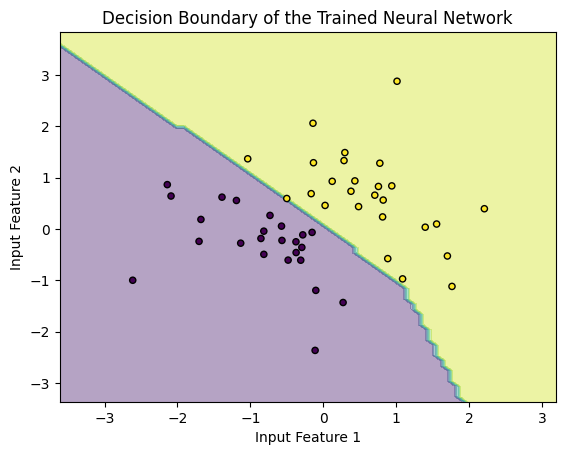

In [9]:
import matplotlib.pyplot as plt

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid
Z = forward_propagation(np.c_[xx.ravel(), yy.ravel()], trained_weights_input_hidden, trained_biases_hidden, trained_weights_hidden_output, trained_biases_output)[1]
Z = (Z > 0.5).astype(int).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel(), s=20, edgecolor='k')
plt.title("Decision Boundary of the Trained Neural Network")
plt.xlabel("Input Feature 1")
plt.ylabel("Input Feature 2")
plt.show()